# Part I - (Dataset Exploration Title)
## by Ayo Mosaku

# INTRODUCTION

#### Dataset: Ford GoBkike System Data


Description: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

#### Columns Description

* duration_sec: Thise expresses the total time taken to complete a trip. It is denoted in seconds
* start_time: According to our data, this specifies the date, time our bike ride starts
* end_time: This shows the date, time our ride ends
* start_station_id: This shows the unique ID of the station where the journey starts
* start_station_name: This names our start point
* start_station_latitude: using lines running from east to west on the earths map, we can pinpoint our start station
* start_station_longitude: this uses lines running from North to South to geomap our start address
* end_station_id: unique ID given to the end station
* end_station_name: name of Ford's station where ride ends
* end_station_latitude: east-west lines pinpointing our end station on the map
* end_station_longitude: north-south lines on the earth's map, which are used to accurately locate our end points
* bike_id: unique ID for every unique bike
* user_type: this column specifies if the user is a monthly subscriber or an occassional customer really
* member_birth_year: it gives a bit of insight into our user by giving its name
* member_gender:it tells us the gender of our users
* bike_share_for_all_trip: this gives insight into what users are into the 'bike share for all' program. This simply entails offering discounted memberships or pay-as-you-go options to individuals who qualify based on their income level.

#### Research Areas

1. Target Variable(user_type):
    In here, we would try visualize as many individual variables as needed 
2. Bivariate Analysis: Studying how other variables such as 'duration_sec', 'member_birth_year', 'bike_share_for_all_trip', 'member_gender' relates to our user type. We would also try to discover new insights as possible
3. Multivariate Analysis: I reckon this is where we try and drive home our point and really see how user_types in our data are affected(data Correlation) by svereal different factors

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd



import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


> Loading in our dataset and describing its properties through the questions below. 

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Looking at this dataset for quite a while from Ford's context, we really see two columns standing out, the 'user_type' and 'bike_share_for_all_trip' columns

Making a copy so we have our original dataset still

In [4]:
dff = df.copy()

### Defining a function to calculate null values
Checking for null values in our dff dataframe

In [5]:
def print_null_values(dff):
    null_counts = df.isnull().sum() 
    print("Number of null values in each column:")
    print(null_counts)

In [6]:
print_null_values(dff)

Number of null values in each column:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [7]:
dff.shape

(183412, 16)

Our dataset as given has 183412 rows and 16 columns


# DATA WRANGLING

In [8]:
dff.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [9]:
dff.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
dff.info()
#visually accessing our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Needing member_birth_year to get our Age columns, as long as our genders for further insights, I would need only columns where the 'member_gender' is present, hence, I would dropna 'member_birth_year' columns

In [11]:
dff['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
dfcleaned=dff[(dff['member_gender']=='Male')|(dff['member_gender']=='Female')|(dff['member_gender']=='Other')]

In [13]:
print_null_values(dfcleaned)

Number of null values in each column:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [14]:
color=sns.color_palette()[0]

Our first diagram is a plot of na values in our dataset

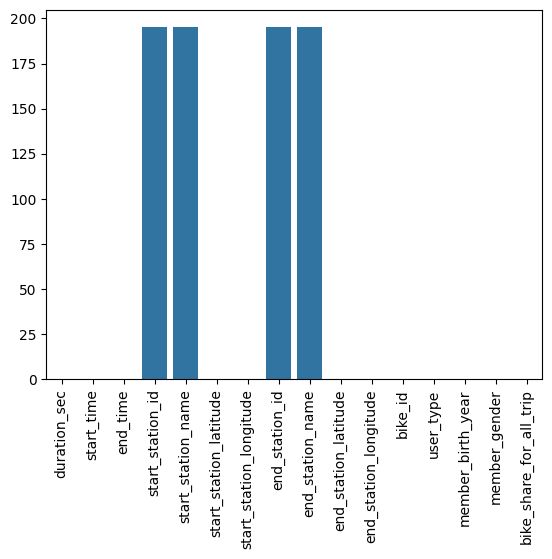

In [15]:
na_counts = dfcleaned.isna().sum()
sns.barplot(x=na_counts.index.values, y=na_counts, color=color)
plt.xticks(rotation=90);

The only 4 coluumns still null are the 'start_station_id', 'start_station_name', 'end_station_id' and 'end_station_name'. I would choose to drop these as a wrong value here would most definitely alter the nature of our results

In [16]:
df1 = dfcleaned.dropna(subset=['start_station_id','start_station_name','end_station_id','end_station_name'], axis=0)

In [64]:
#using our function to check null values in this wrangled dataset

print_null_values(df1)

Number of null values in each column:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [19]:
df1['Age'] = 2024 - df1['member_birth_year']
#making an age column to simplify our analysis

/tmp/ipykernel_31/4137078409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = 2024 - df1['member_birth_year']


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [21]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,40.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,52.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,35.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,50.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,65.0


#### From these, we can see we have wrangled to be sure it is tidy(visually ascertained), its quality is also fine(Complete, Accurate, Valid, Consistent and Unique)

## Univariate Exploration

> In this section, we investigate distributions of individual variables. From this, we might spot one or two outliers to be cleaned.


<AxesSubplot: ylabel='Age'>

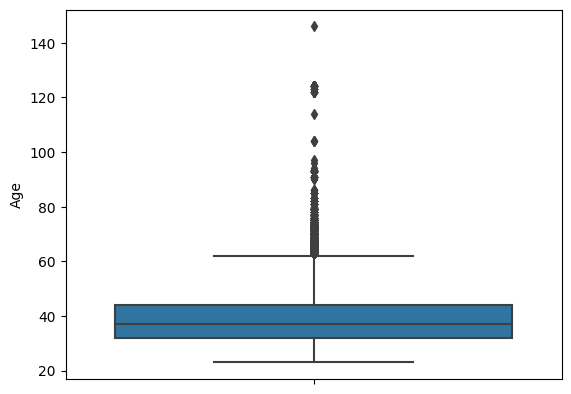

In [22]:
#Our newly formed age column:
sns.boxplot(data=df1, y=df1['Age'])


This large base indicates there are so many values around the age. 
And also we see the age minimum to be a bit past 20
its mean around (before) 40
and so many outliers past 100.

REMEMBER: using the .describe() method earlier had shown us these outliers for age, but a box plot helps see it beter

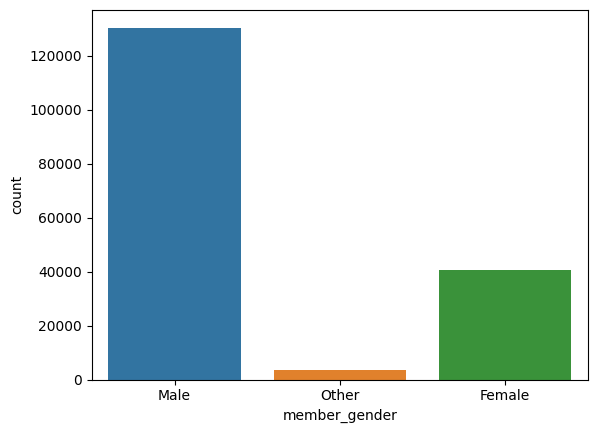

In [23]:
#What are the different genders
sns.countplot(data=df1, x='member_gender');

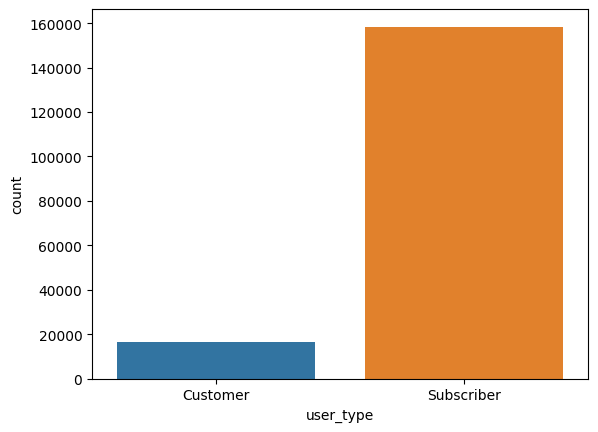

In [24]:
#Checking our usertypes
sns.countplot(data=df1, x='user_type');

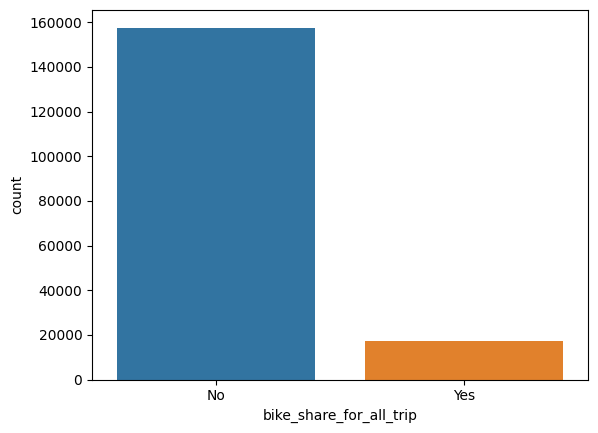

In [25]:
#Now, to check who shares our bike trips
sns.countplot(data=df1, x='bike_share_for_all_trip');

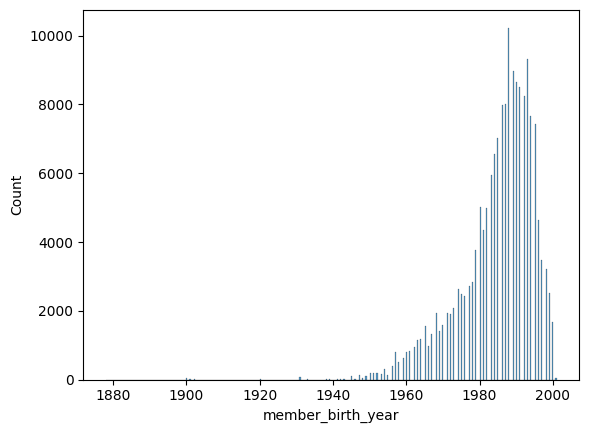

In [26]:
sns.histplot(data=dff, x='member_birth_year');

Again, we see some very dodgy Ages, at this point, some inexcusable birthyears in our biking data. Therefore, we would go ahead and sort this out

In [27]:
df1[df1['member_birth_year']<1924]
#i would like to believe only centurions(100year olds) would use our Ford eBikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,124.0
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No,124.0
16087,1131,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No,124.0
17981,366,2019-02-26 19:53:38.5280,2019-02-26 19:59:44.9680,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920.0,Male,No,104.0
18885,432,2019-02-26 17:48:59.0160,2019-02-26 17:56:11.3700,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,5319,Subscriber,1920.0,Male,No,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.6070,2019-02-03 17:56:42.9490,37.0,2nd St at Folsom St,37.785000,-122.395936,375.0,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900.0,Male,No,124.0
173711,993,2019-02-03 09:45:30.4640,2019-02-03 10:02:04.1690,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900.0,Male,No,124.0
177708,1527,2019-02-01 19:09:28.3870,2019-02-01 19:34:55.9630,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900.0,Male,No,124.0
177885,517,2019-02-01 18:38:40.4710,2019-02-01 18:47:18.3920,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No,122.0


In [28]:
dropindices=df1[df1['member_birth_year']<1924].index

In [29]:
df1.drop(index=dropindices, inplace=True)

/tmp/ipykernel_31/2911303323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=dropindices, inplace=True)


In [30]:
df1['Age'].describe()

count    174877.00000
mean         39.16093
std           9.97047
min          23.00000
25%          32.00000
50%          37.00000
75%          44.00000
max          97.00000
Name: Age, dtype: float64

Really, we can see now that we have successfully dropped our 'shady' ages and birthyears.
These were only properly visualized with our box plot

<AxesSubplot: ylabel='Age'>

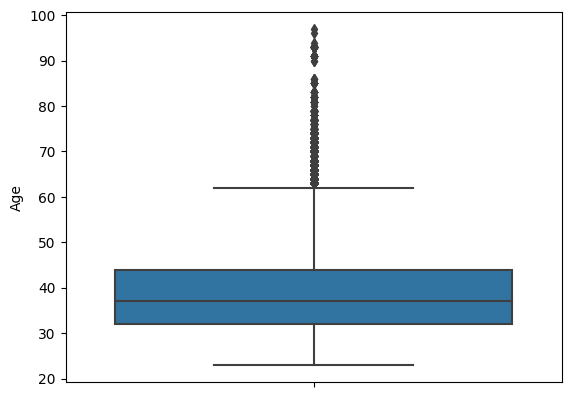

In [31]:
sns.boxplot(data=df1, y='Age')
#reconfirming, visually that our Ages are what we expect it to be

The wider base between 30 and about 45 denotes that so many Ages were around these ages

In [32]:
df1['Age'].describe()
#done a describe on the Age column to guage how our bins. That is we explicitly see our min and max

count    174877.00000
mean         39.16093
std           9.97047
min          23.00000
25%          32.00000
50%          37.00000
75%          44.00000
max          97.00000
Name: Age, dtype: float64

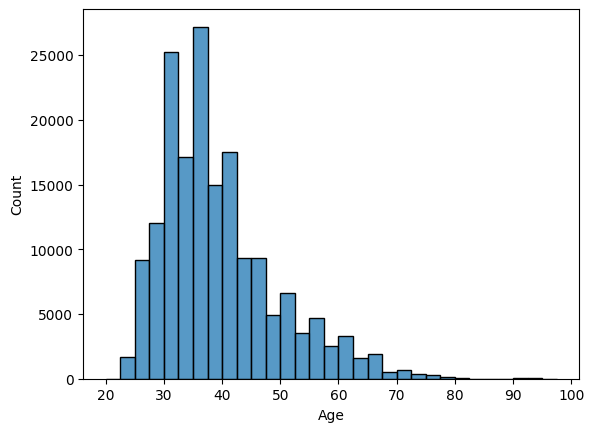

In [33]:
bins = np.arange(20, df1['Age'].max()+2.5, 2.5)
sns.histplot(data=df1, x='Age', bins=bins);

In [34]:
df1['duration_sec'].describe()

count    174877.000000
mean        704.026007
std        1642.528644
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

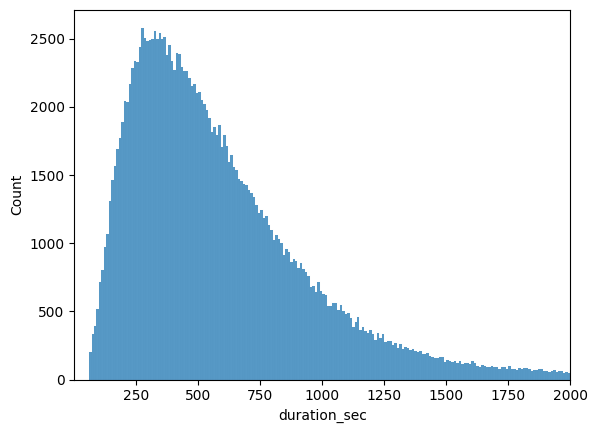

In [35]:
bins = np.arange(50, 85000, 10)
ax=sns.histplot(data=df1, x='duration_sec', bins=bins)
#liimiting from 1 to 2000s only
ax.set_xlim(1, 2000);

here, we see how our duration_sec of riders declines quickly before the 500second mark

In [36]:
#reconfirming our age column
df1[df1['member_birth_year']<1924]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age


Moving on to other important columns

In [37]:
df1['member_gender'].value_counts()

Male      130440
Female     40791
Other       3646
Name: member_gender, dtype: int64

In [38]:
onyx=df1['member_gender'].value_counts()

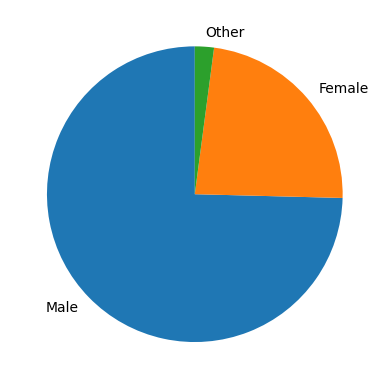

In [39]:
plt.pie(data=df1, x=dff['member_gender'].value_counts(), labels = onyx.index, startangle=90);

One of our two most important variables, Gender, we can see how it is shared 

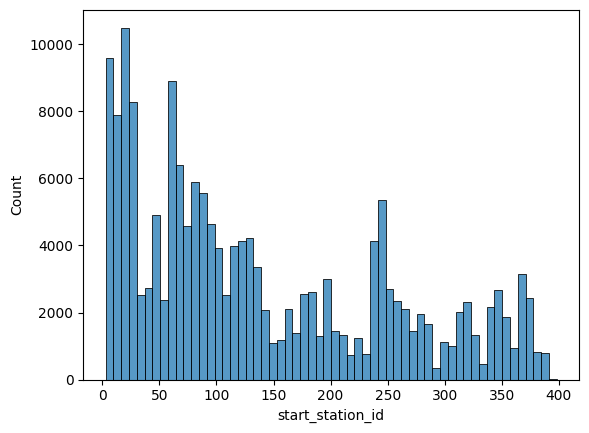

In [40]:
sns.histplot(data=df1, x='start_station_id');

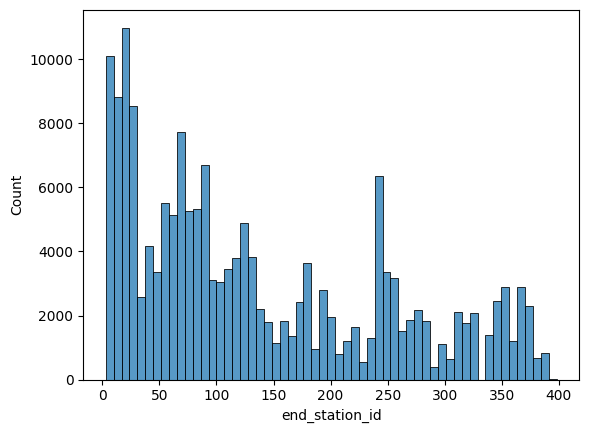

In [41]:
sns.histplot(data=df1, x='end_station_id');

### Exploring other columns

below we try and see our other columns

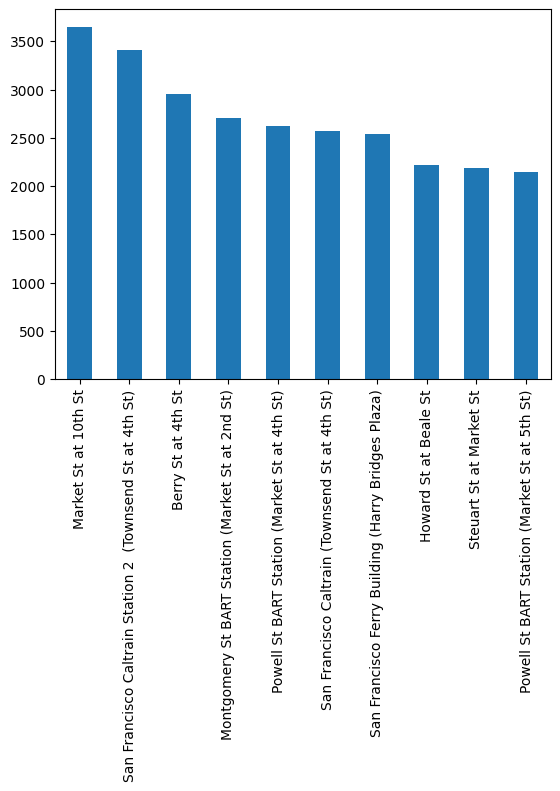

In [42]:
df1['start_station_name'].value_counts().head(10).plot(kind='bar');

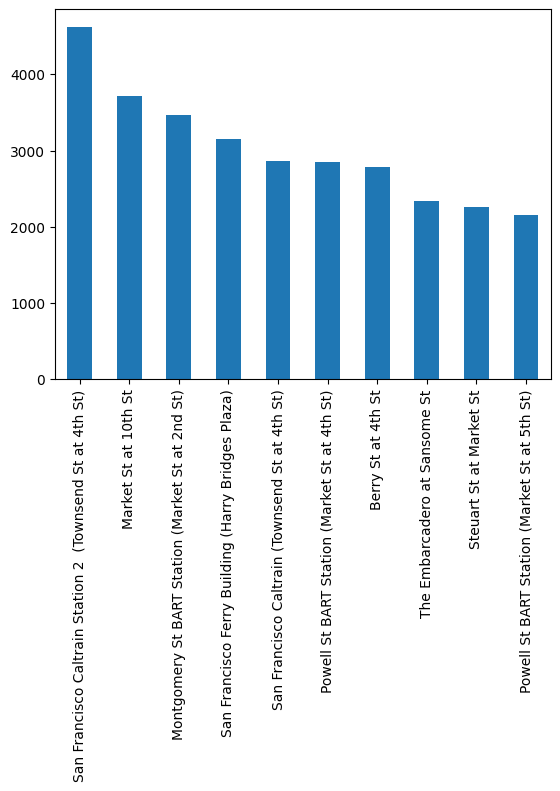

In [43]:
df1['end_station_name'].value_counts().head(10).plot(kind='bar');

* Here, we use pandas in build to visualize our top 10 in both start_station and end_station names, 
* Very interestingly, Market Street and SF Caltrain Station are our two highest starts / ends

In [44]:
df1['member_birth_year'].describe()

count    174877.00000
mean       1984.83907
std           9.97047
min        1927.00000
25%        1980.00000
50%        1987.00000
75%        1992.00000
max        2001.00000
Name: member_birth_year, dtype: float64

<AxesSubplot: xlabel='member_birth_year', ylabel='Count'>

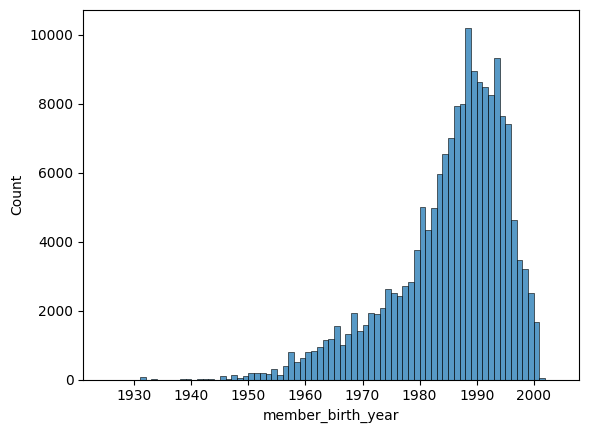

In [45]:
#after wragnling around our Age rows, let us try n redraw the distribution of birth_years
bins = np.arange(1925, 2005, 1)
sns.histplot(data=df1, x='member_birth_year', bins=bins)

#### In this, we were able to use a box plot to visualize and point out odities in our Age column
This was followed by proper cleaning and limiting(only Ages < 100 were allowed in our data) 

## Bivariate Exploration

> In this section, we try to investigate relationships between 2 different variables of same/different types


In [46]:
df1['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3406
Berry St at 4th St                                           2951
Montgomery St BART Station (Market St at 2nd St)             2709
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [47]:
df1.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
Age                        float64
dtype: object

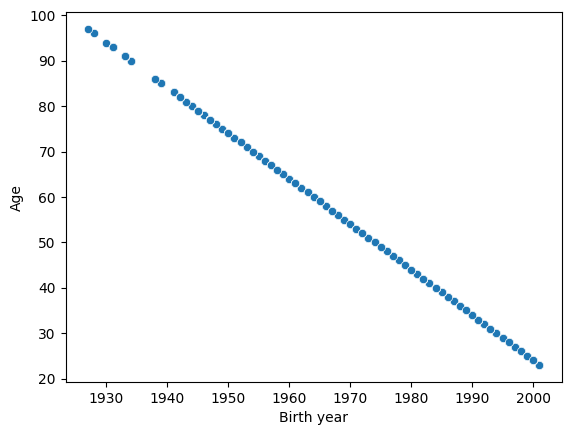

In [48]:
#To revisit our Age/BirthYear columns, we expect a perfect correlation because Age is derived from birth_year
sns.scatterplot(data=df1, x='member_birth_year', y='Age')
plt.xlabel('Birth year');

#### NOTE: we create a mini dataframe which is a subset of our df1

We do this so we can very easily map out each age as its own value

In [49]:
dff1 = df1.dropna(subset=['Age']).copy()
dff1['Age']=dff1['Age'].astype(int)

 
#here we attempt to wrangle our Age data more by copying the dropped 'Age' columns before casting it to type int.


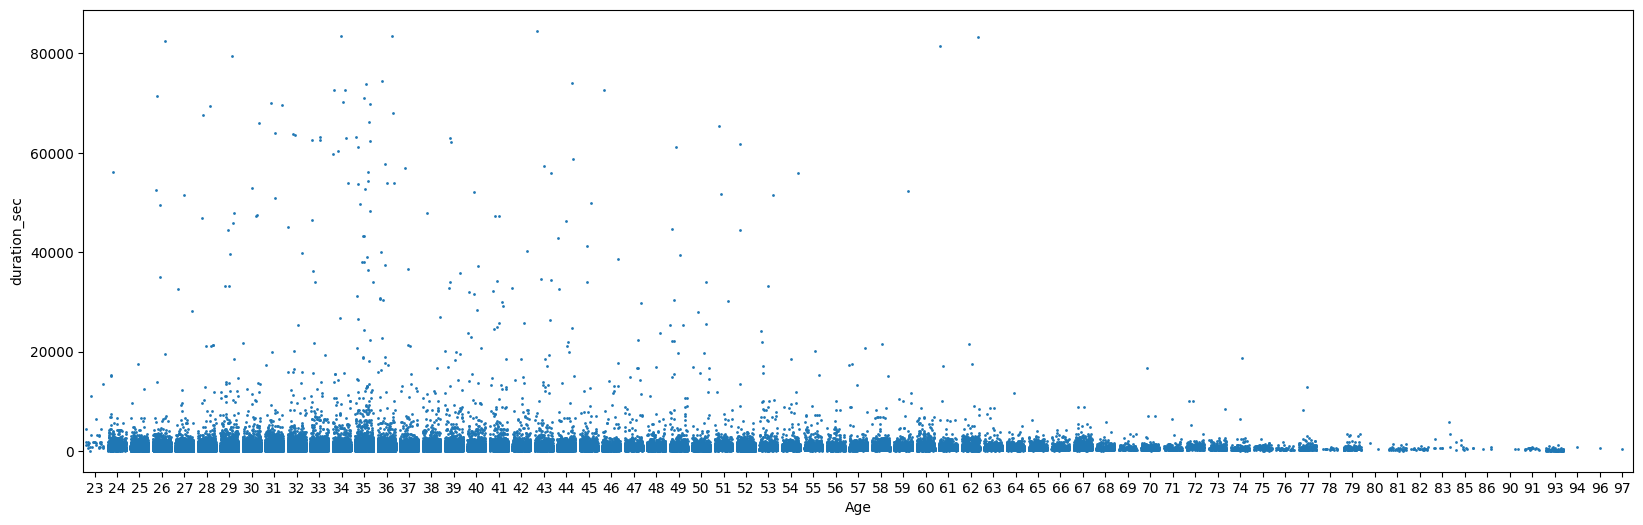

In [61]:
plt.figure(figsize=(20,6))


sns.stripplot(data=dff1, y='duration_sec', x='Age', size=2, jitter=0.4, dodge=True);

The above scatterplot tends to give us a neegative correlation 
because as Age INCREASES, Duration_sec REDUCES, 
denoting higher bike rides tend to occur more in younger people

so also to note the various outliers for different cycling durations

<AxesSubplot: xlabel='member_gender', ylabel='Age'>

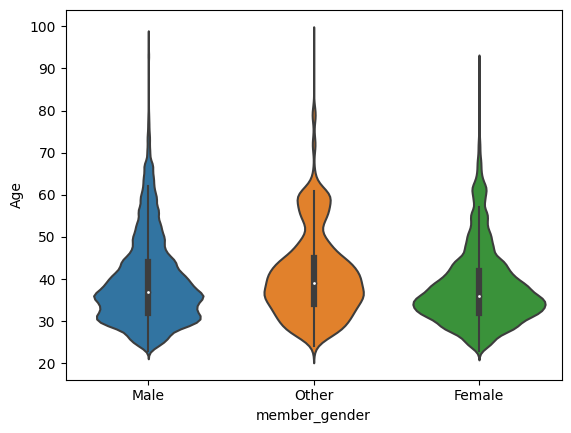

In [51]:
sns.violinplot(data=df1, x='member_gender', y='Age')

* Male: the peak Age is shown to be a bit past 60, with a modrerately wide range of values(onnly lower to female) around its early to mid 30s
* Female: a much more wider range of values as seen in the violin denoting females, with peak about mid 50s, and short tail signifying not too high values 
* Other: a very toned distribution, with ages peaking around mid to late 30s

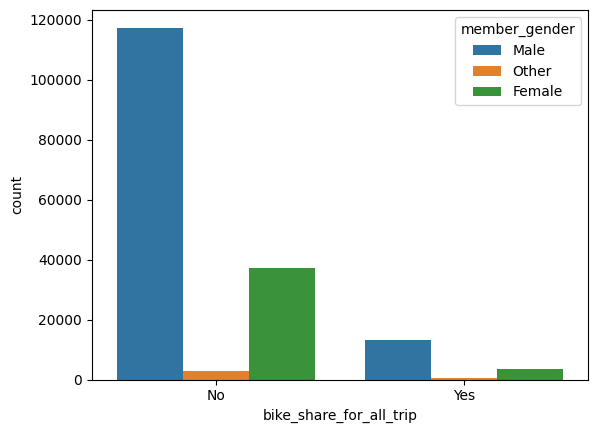

In [52]:
sns.countplot(data=df1, x='bike_share_for_all_trip', hue='member_gender');

* Really, the trend - count of men > women > other is followed, but, it is interesting to note that MOST, almsot 9x the amount of people arent in the bike_share program

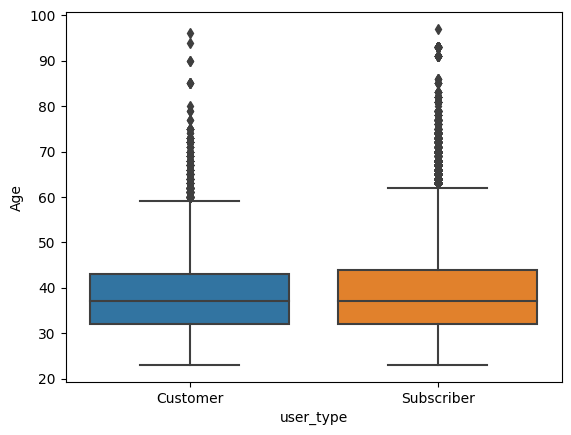

In [53]:
sns.boxplot(data=df1, y='Age', x='user_type');

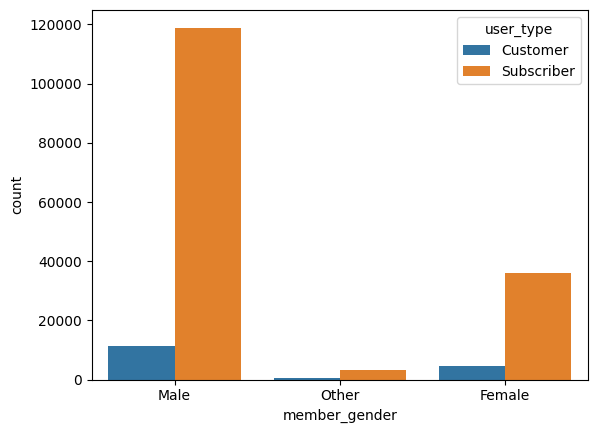

In [54]:
sns.countplot(data=df1, x='member_gender', hue='user_type');

<AxesSubplot: xlabel='bike_share_for_all_trip', ylabel='count'>

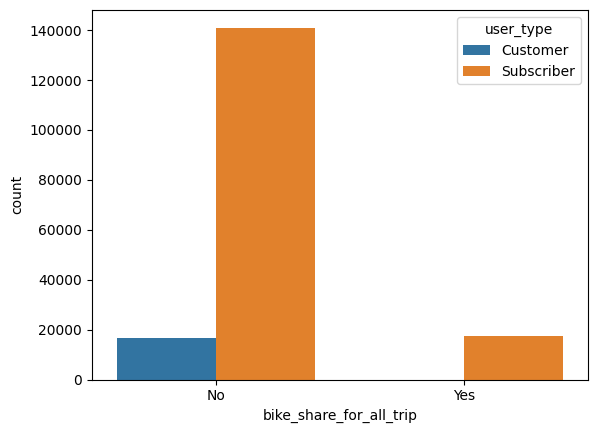

In [55]:
sns.countplot(data=df1, x='bike_share_for_all_trip', hue='user_type')

### In all, our target variable 'user_type' shows us quite a number of interesting relationships

* Our Age-user_type relation shows our median ages to be around the same near-40 range but the subscribe has a slightly  higher interquartile range denoting a more varied age distribution
* In terms of gender distribution with user_type, the story is qute the same. for both subscribers and occasional users, men have more, followed by women, followed by other
* In the final relationship visualization, knowing there are more NOT IN our bikeshare program, it is interesting to nnote that for those willing to participate, there are NO occassional customers


## Multivariate Exploration

> Here, we would create plots of our 'user_type' and 2 more variables to investigate our data even
further. 


In [56]:
df1.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
Age                        float64
dtype: object

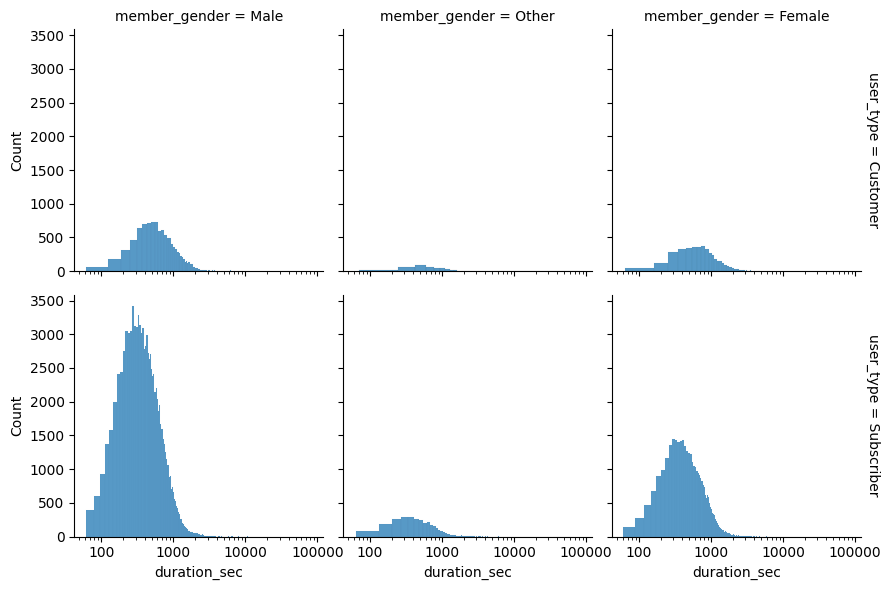

In [57]:
g = sns.FacetGrid(data=df1, col="member_gender", row="user_type", margin_titles=True)
g.map(sns.histplot, "duration_sec")

# Looping through each axis
for ax in g.axes.flatten():
    ax.set_xscale('log')

    # our ticks
    ticks = [10**2, 10**3, 10**4, 10**5]

    ax.set_xticks(ticks)
    ax.set_xticklabels([str(tick) for tick in ticks])

    # Using ScalarFormatter method to avoid scientific notation
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())


This Facetgrid shows our order of count men > count female > count other with subscribers having a greater peak cycling durations in all genders  

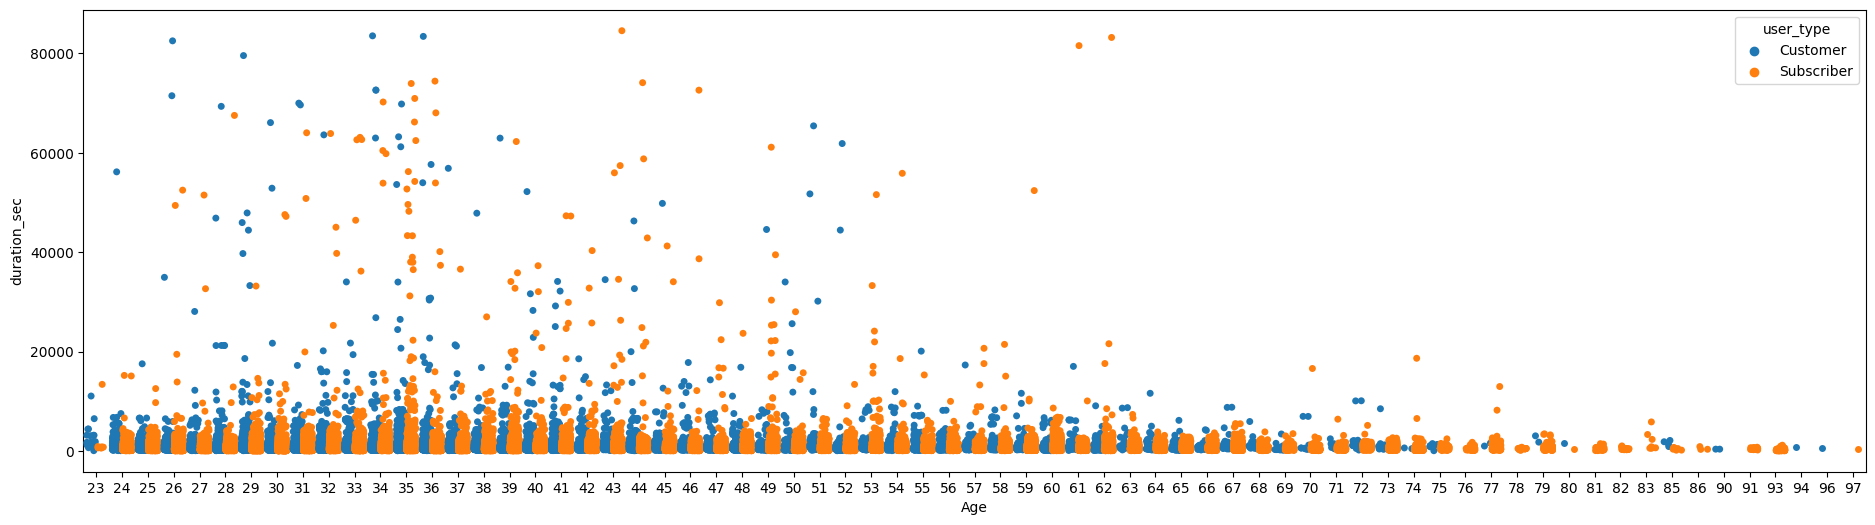

In [62]:
plt.figure(figsize=(23,6))
sns.stripplot(data=dff1, x='Age', y='duration_sec', hue='user_type', jitter=0.35, dodge=True);

#Here we attempt to show the outliers amongst different ages using a 'dff1' for ages without 

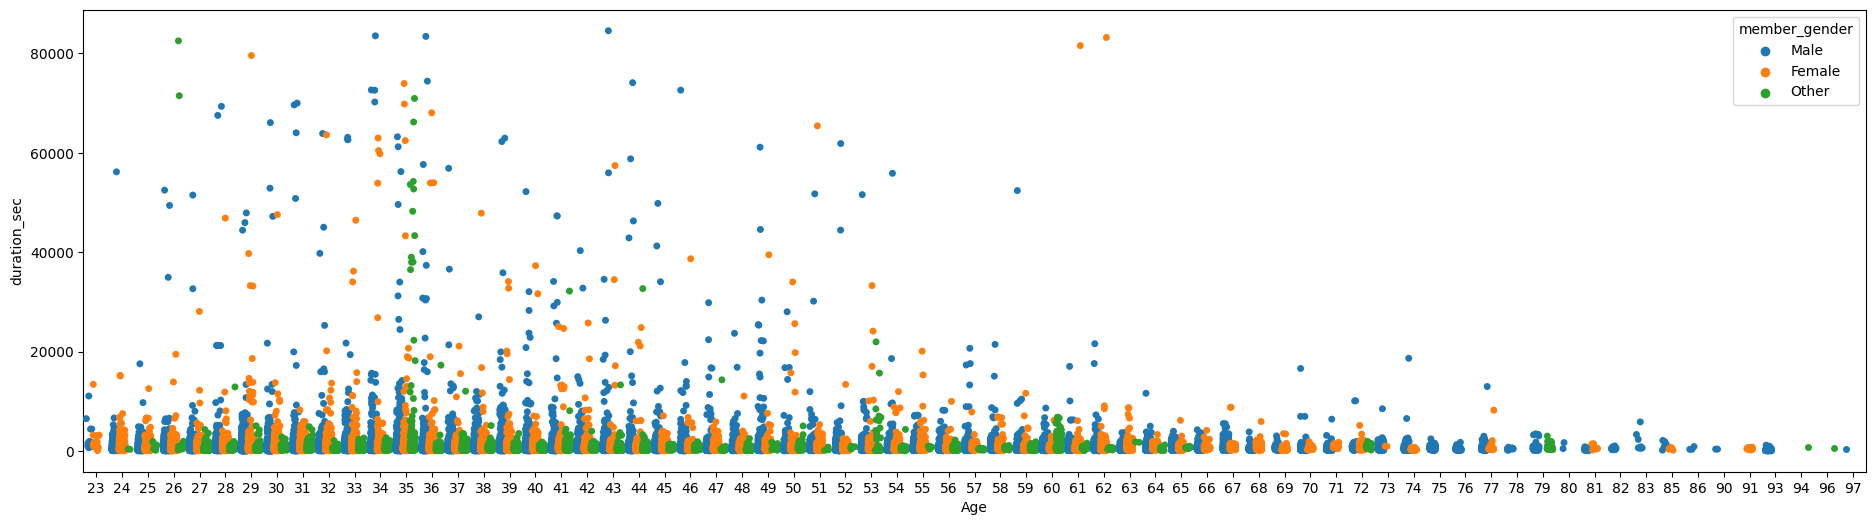

In [63]:
plt.figure(figsize=(23,6))
sns.stripplot(data=dff1, x='Age', y='duration_sec', hue='member_gender', jitter=0.35, dodge=True);

#still using a jitter:

* still considering our tcycling duration, our scatter plots help visualize how subscribers, occassional customers of different Ages tend to use the bikes
* This provides a result very very similar to the Age-Duration_sec plotted earlier

# CONCLUSION

#### To revisit our research questions:
    1. What factors are important for the user_type to be a subscriber if any ?
    2. How do the factors vary with each other
    

#### AGE

Ourr Age column, previous having values above 100 shown its median value to be exactly 37 years old. There is a trend in the ages, because when it comes to older Ages, duration in sec thins out.  

#### GENDER

Our data set has a 3 way gender system. One for Males, another for females, one more for "Others". To note, there are more males than females with males even having the highest count in EVERY context. From subscribers, to customers, to riding duration, to bike_sharing

#### STATION NAMES

A commmon intercept between our end and start station shows that 'Market St at 10th Street', 'SF Caltrain Station 2' and 'Montgomery St Bart Station' are our most busiests

#### BIRTH YEAR

After wrangling, we should our most common birth_year be 1988 with over 69 unique birth years rangin from 1927 to 2001

#### USER TYPE vs AGE

From our vissualisations, we see user types arent too influenced by the Age. 
It only has its median for both user types around 36-38 with subscribes still 
We can although interprete that subscribers tend to be older on average compared to occasional users. this can make us denote that younger people are just very quicker to commute and not really subscirbe

#### USER TYPE vs GENDER

Usertypes are in all 3 gender notations but Men just seem to have more counts for both subscribers and occassional customers. It is good to note that 'other' are not too common to be riders. This can either be down to wrong gender input or maybe the 'other' gender would rather just use another form of commuting

#### USER_TYPE vs BIKE_SHARE

Being our main aim, bikeshare, we can clearly see there are very very few customers sharing bikes for trips. 
Our best hypotheses here are:

1. Customers arent so aware of our bike shar eprogram
2. Occasional users might not feel the need to use the service regularly. Their usage might be driven by specific circumstances rather than routine, reducing their overall engagement with the system


# LIMITATIONS

* Our devotion to analysing just the user type at ANY gievn time(time independent) left us with very little to discover
* At first, our dataset wasnt complete, so many columns were empty and we had to make decisions regarding them
* From what we had left to work with, the columns were mainly categorical, hence our need for majorly countplots

In [60]:
df1.to_csv('newdf.csv', index=False)